In [1]:
import numpy as np
import warnings
from utils import *
from calibrators import * 
import pickle
warnings.filterwarnings("ignore")
import torch
import sys
sys.path.append('../')
import time
import copy
from SLURM.sklearn_config import *
import time
import tensorflow as tf
from skimage import color
from skimage import io

In [ ]:
i=0
time_dict={}
for data in ['MNIST','Fashion','SignLanguage','CIFAR_RGB','GTSRB_RGB']:
    model_dict={}
    for model_name in ['RF','GB','pytorch']:
        method_dict={}
        for method in ['Stab2avg','Stab3avg','Stab4avg','StabilityCalibrator']:
            ece,std = df[method].iloc[i].split('+-')
            method_dict[method]=(float(ece),float(std))
        i+=1
        model_dict[model_name]=method_dict
    time_dict[data]=model_dict

In [2]:
avg2 =[('RF', 297.9167230129242, 40.27971266144538), ('GB', 186.6633710861206, 64.28684926333821), ('pytorch', 179.1877212524414, 66.96887440794163), ('RF', 119.08310604095459, 87.0652466558462), ('GB', 126.26059985160828, 82.11587789211612), ('pytorch', 121.0684289932251, 85.63751992338305), ('RF', 184.42339611053467, 75.91227737509541), ('GB', 187.17061400413513, 74.79806632301104), ('pytorch', 184.28921580314636, 75.96754882800353), ('RF', 185.44585299491882, 75.4937345532531), ('GB', 189.41275906562805, 73.91265545711869), ('pytorch', 187.39136791229248, 74.7099514559957), ('RF', 47.67721176147461, 145.26856215187752), ('GB', 48.958301067352295, 141.46732727657053), ('pytorch', 47.320666790008545, 146.36311087362742)]

In [7]:
avg3 =[('RF', 77.13597321510315, 155.56943796555888), ('GB', 74.6113510131836, 160.83343669624261), ('pytorch', 78.68045377731323, 152.51564300789641), ('RF', 58.358179807662964, 177.66146980887478), ('GB', 61.16007089614868, 169.52236725829047), ('pytorch', 54.24041390419006, 191.14898382438548), ('RF', 80.18575096130371, 174.59461103951205), ('GB', 79.09125900268555, 177.01071112706182), ('pytorch', 80.04764199256897, 174.895845168052), ('RF', 82.30436205863953, 170.1003403686599), ('GB', 81.55734777450562, 171.6583530733245), ('pytorch', 80.7957329750061, 173.27647741410865), ('RF', 20.385094165802002, 339.75805770959084), ('GB', 21.39473795890808, 323.7244603463926), ('pytorch', 20.759530305862427, 333.6298990369796)]

In [9]:
avg4 =[('RF', 50.21911120414734, 238.95285504393757), ('GB', 50.17699313163757, 239.15342971067284), ('pytorch', 53.39487099647522, 224.7406871868304), ('RF', 34.19599103927612, 303.1934353969077), ('GB', 31.693552255630493, 327.132784497455), ('pytorch', 32.58966779708862, 318.1376399585828), ('RF', 53.52202486991882, 261.57455802589544), ('GB', 52.63560199737549, 265.9796690593197), ('pytorch', 48.34246611595154, 289.6004512144743), ('RF', 49.8292510509491, 280.9594706869138), ('GB', 52.53409004211426, 266.49362326018814), ('pytorch', 52.62637901306152, 266.02628306472104), ('RF', 16.290088891983032, 425.16649515697526), ('GB', 14.030224800109863, 493.648540823506), ('pytorch', 14.139522790908813, 489.83265577061485)]

In [10]:
avg2,avg3,avg4

([('RF', 297.9167230129242, 40.27971266144538),
  ('GB', 186.6633710861206, 64.28684926333821),
  ('pytorch', 179.1877212524414, 66.96887440794163),
  ('RF', 119.08310604095459, 87.0652466558462),
  ('GB', 126.26059985160828, 82.11587789211612),
  ('pytorch', 121.0684289932251, 85.63751992338305),
  ('RF', 184.42339611053467, 75.91227737509541),
  ('GB', 187.17061400413513, 74.79806632301104),
  ('pytorch', 184.28921580314636, 75.96754882800353),
  ('RF', 185.44585299491882, 75.4937345532531),
  ('GB', 189.41275906562805, 73.91265545711869),
  ('pytorch', 187.39136791229248, 74.7099514559957),
  ('RF', 47.67721176147461, 145.26856215187752),
  ('GB', 48.958301067352295, 141.46732727657053),
  ('pytorch', 47.320666790008545, 146.36311087362742)],
 [('RF', 77.13597321510315, 155.56943796555888),
  ('GB', 74.6113510131836, 160.83343669624261),
  ('pytorch', 78.68045377731323, 152.51564300789641),
  ('RF', 58.358179807662964, 177.66146980887478),
  ('GB', 61.16007089614868, 169.52236725829

In [3]:
time_dict_1={}
time_dict_1['CIFAR_RGB']={'RF':6.76,'GB':6.84,'pytorch':7.08}
time_dict_1['GTSRB_RGB']={'RF':23.23,'GB':21.78,'pytorch':25.29}
time_dict_1['MNIST']={'RF':22.42,'GB':22.91,'pytorch':22.73}
time_dict_1['Fashion']={'RF':22.85,'GB':23.20,'pytorch':22.99}
time_dict_1['SignLanguage']={'RF':45.16,'GB':46.84,'pytorch':46.61}



In [4]:
time_dict_2={}
time_dict_2['CIFAR_RGB']={'RF':40.27,'GB':64.28,'pytorch':66.96}
time_dict_2['GTSRB_RGB']={'RF':87.06,'GB':82.11,'pytorch':85.63}
time_dict_2['MNIST']={'RF':75.91,'GB':74.79,'pytorch':75.96}
time_dict_2['Fashion']={'RF':75.49,'GB':73.91,'pytorch':74.70}
time_dict_2['SignLanguage']={'RF':145.26,'GB':141.46,'pytorch':146.36}


In [5]:
time_dict_3={}
time_dict_3['CIFAR_RGB']={'RF':155.56,'GB':160.83,'pytorch':152.51}
time_dict_3['GTSRB_RGB']={'RF':177.66,'GB':169.52,'pytorch':191.14}
time_dict_3['MNIST']={'RF':174.59,'GB':177.01,'pytorch':174.89}
time_dict_3['Fashion']={'RF':170.1,'GB':171.65,'pytorch':173.27}
time_dict_3['SignLanguage']={'RF':339.75,'GB':323.72,'pytorch':333.62}


In [6]:
time_dict_4={}
time_dict_4['CIFAR_RGB']={'RF':238.95,'GB':239.15,'pytorch':224.74}
time_dict_4['GTSRB_RGB']={'RF':303.19,'GB':327.13,'pytorch':318.13}
time_dict_4['MNIST']={'RF':261.57,'GB':265.97,'pytorch':289.6}
time_dict_4['Fashion']={'RF':280.95,'GB':266.49,'pytorch':266.02}
time_dict_4['SignLanguage']={'RF':425.16,'GB':493.64,'pytorch':489.83}




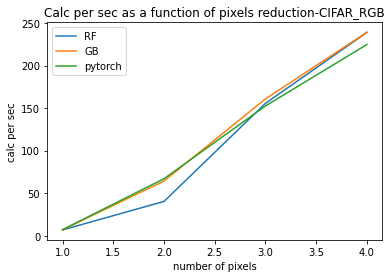

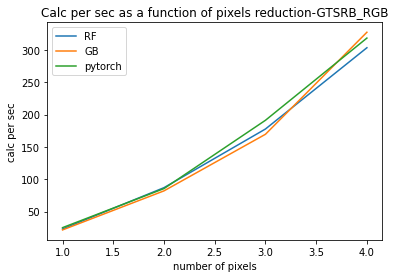

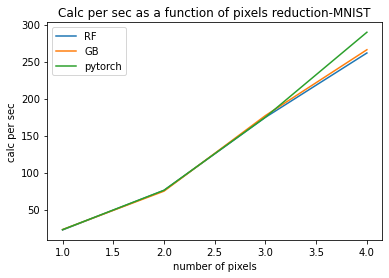

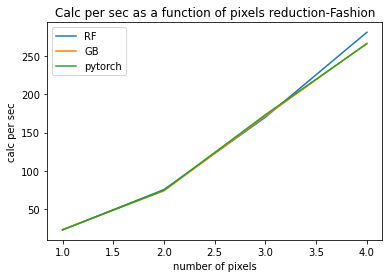

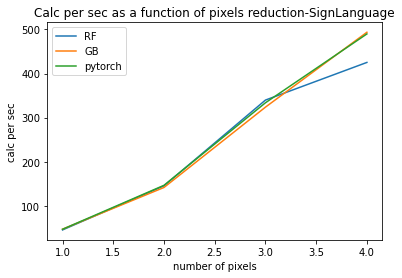

In [7]:
for data in ['CIFAR_RGB','GTSRB_RGB','MNIST','Fashion','SignLanguage']:
    for model_name in ['RF','GB','pytorch']:
        y=[time_dict_1[data][model_name],time_dict_2[data][model_name],time_dict_3[data][model_name],time_dict_4[data][model_name]]
        x=[1,2,3,4]
        plt.plot(x,y,label=f'{model_name}')
        plt.xlabel("number of pixels")
        plt.ylabel("calc per sec")
    plt.title(f'Calc per sec as a function of pixels reduction-{data}')
    plt.legend(['RF','GB','pytorch'])
    plt.savefig(f'./stab/{data}_calc_pixel_graph.png')
    plt.show()

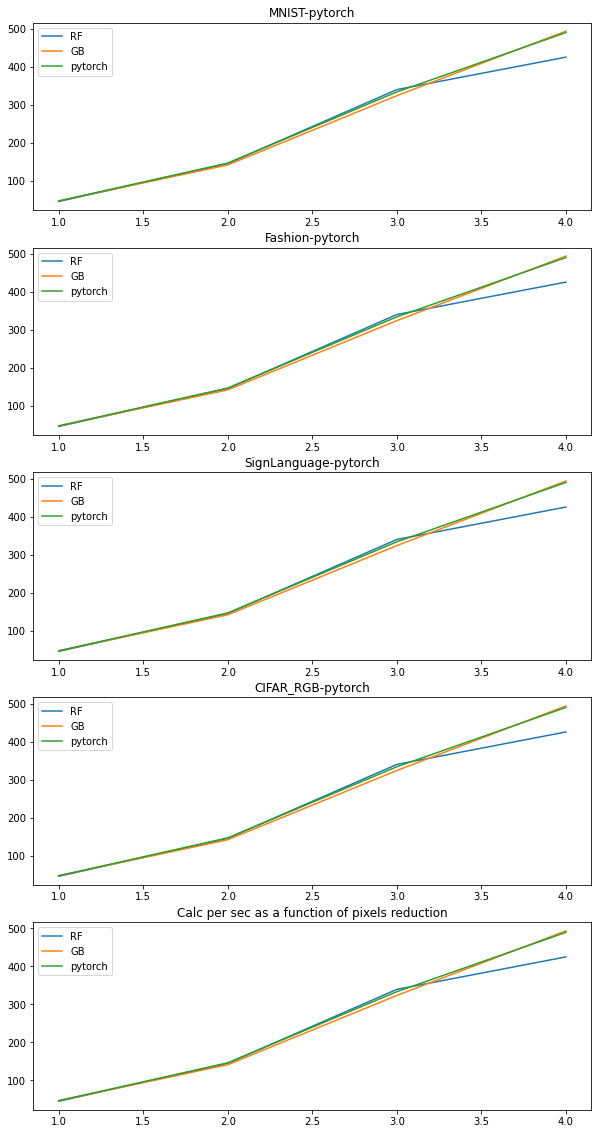

In [11]:
datasets = ['MNIST','Fashion','SignLanguage','CIFAR_RGB','GTSRB_RGB']
models = ['RF','GB','pytorch']
plt.figure(1,figsize=(10,20))

i=1
for dataset_name in datasets:
    for model_name in models:
        stab=[]
        for shuffle in range(10):
            s=np.load(f'./stab/{dataset_name}/test_stab_4pool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab.append(s)
        stab=np.array(stab).flatten()
        plt.subplot(5,1,i)
        y=[time_dict_1[data][model_name],time_dict_2[data][model_name],time_dict_3[data][model_name],time_dict_4[data][model_name]]
        x=[1,2,3,4]
        plt.plot(x,y,label=f'{model_name}')
        # plt.xlabel("number of pixels")
        # plt.ylabel("calc per sec")
        plt.legend(['RF','GB','pytorch'])
        plt.title(f'{dataset_name}-{model_name}')
    i+=1
plt.title(f'Calc per sec as a function of pixels reduction')
plt.show()


        

      

In [33]:
float(df_time.loc['MNIST-RF'][0][1:-6])

14.504847738339228

[14.504847738339228, 83.29325442150817, 188.56931574550197, 273.2407445533997]
[20.48513286468952, 83.63714169457049, 188.31957785400155, 286.4621253400784]
[22.018877021206308, 83.48628813859557, 189.08455129695804, 286.6662108928116]
[22.186568761493547, 83.70878706110024, 185.54666770949842, 282.783643399206]
[17.213909043464312, 83.76824512428641, 188.55599809364037, 281.60920003270337]
[21.77179857337523, 83.64406354957654, 188.40346559733706, 282.0863610066421]
[38.922914566382715, 159.26689656378954, 338.77396776810207, 473.52838585088244]
[42.415085360489414, 163.38222630703183, 337.7182071256529, 473.6993880696908]
[43.24296350421836, 163.506744494672, 339.90167295780753, 475.7146167826981]
[18.736862280464937, 73.09906789816327, 178.35297269660248, 258.40079929226476]
[18.712425943337855, 73.2509857181584, 178.77536794641225, 258.22224825964906]
[18.81778304165267, 73.12061815834682, 179.51757677225476, 258.12081470969895]
[1.5368582495209817, 97.43973710072241, 200.104019436

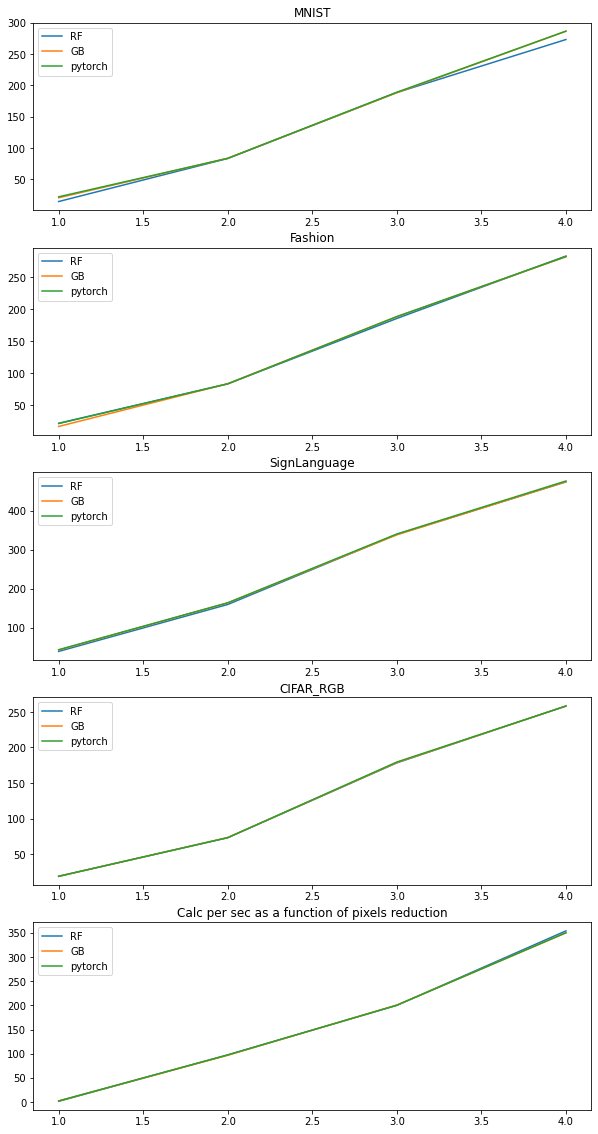

In [35]:
df_time=pd.read_csv('Full_time_df.csv')
df_time=df_time.rename(df_time['Unnamed: 0'], axis='rows').drop(columns=['Unnamed: 0'])

datasets = ['MNIST','Fashion','SignLanguage','CIFAR_RGB','GTSRB_RGB']
models = ['RF','GB','pytorch']
plt.figure(1,figsize=(10,20))

i=1
for dataset_name in datasets:
    for model_name in models:
        plt.subplot(5,1,i)
        y=[float(df_time.loc[f'{dataset_name}-{model_name}'][0][1:-6]),float(df_time.loc[f'{dataset_name}-{model_name}'][1][1:-6]),float(df_time.loc[f'{dataset_name}-{model_name}'][2][1:-6]),float(df_time.loc[f'{dataset_name}-{model_name}'][3][1:-6])]
        x=[1,2,3,4]
        plt.plot(x,y,label=f'{model_name}')
        print(y)
        # plt.xlabel("number of pixels")
        # plt.ylabel("calc per sec")
        plt.legend(['RF','GB','pytorch'])
        plt.title(f'{dataset_name}')
    i+=1
plt.title(f'Calc per sec as a function of pixels reduction')
plt.show()




In [2]:
df=pd.read_csv('all_eces.csv')
i=0
ece_dict={}
for data in ['MNIST','Fashion','SignLanguage','CIFAR_RGB','GTSRB_RGB']:
    model_dict={}
    for model_name in ['RF','GB','pytorch']:
        method_dict={}
        for method in ['Stab2avg','Stab3avg','Stab4avg','Stab2max','Stab3max','Stab4max','StabilityCalibrator']:
            ece,std = df[method].iloc[i].split('+-')
            method_dict[method]=(float(ece),float(std))
        i+=1
        model_dict[model_name]=method_dict
    ece_dict[data]=model_dict
ece_dict

{'MNIST': {'RF': {'Stab2avg': (0.004, 0.0008),
   'Stab3avg': (0.0036, 0.0007),
   'Stab4avg': (0.0047, 0.0007),
   'Stab2max': (0.0032, 0.0005),
   'Stab3max': (0.0042, 0.0006),
   'Stab4max': (0.0038, 0.0008),
   'StabilityCalibrator': (0.0039, 0.0006)},
  'GB': {'Stab2avg': (0.0038, 0.001),
   'Stab3avg': (0.0035, 0.0007),
   'Stab4avg': (0.0036, 0.0009),
   'Stab2max': (0.003, 0.0007),
   'Stab3max': (0.0034, 0.001),
   'Stab4max': (0.0032, 0.0009),
   'StabilityCalibrator': (0.0036, 0.0007)},
  'pytorch': {'Stab2avg': (0.0019, 0.0004),
   'Stab3avg': (0.0022, 0.0006),
   'Stab4avg': (0.0018, 0.0004),
   'Stab2max': (0.0018, 0.0004),
   'Stab3max': (0.002, 0.0004),
   'Stab4max': (0.0016, 0.0005),
   'StabilityCalibrator': (0.0016, 0.0006)}},
 'Fashion': {'RF': {'Stab2avg': (0.0081, 0.0016),
   'Stab3avg': (0.0078, 0.001),
   'Stab4avg': (0.0082, 0.0014),
   'Stab2max': (0.0087, 0.0014),
   'Stab3max': (0.0083, 0.0016),
   'Stab4max': (0.0072, 0.0013),
   'StabilityCalibrator': (0.

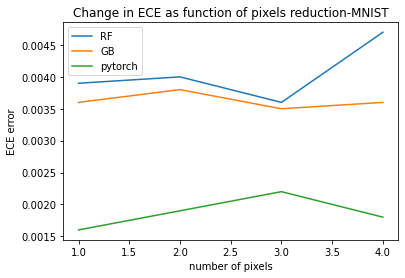

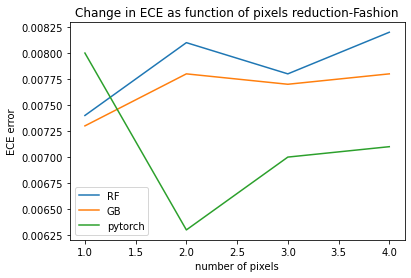

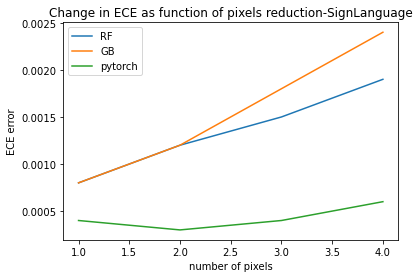

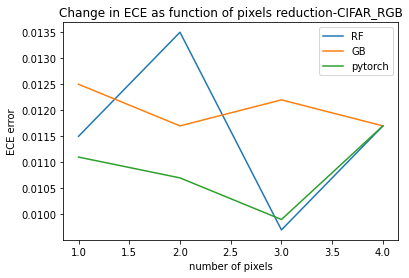

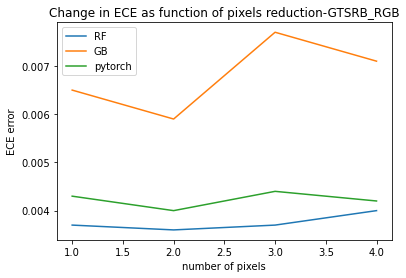

In [31]:
for data in ['MNIST','Fashion','SignLanguage','CIFAR_RGB','GTSRB_RGB']:
    for model_name in ['RF','GB','pytorch']:
        y=[ece_dict[data][model_name]['StabilityCalibrator'][0],ece_dict[data][model_name]['Stab2avg'][0],ece_dict[data][model_name]['Stab3avg'][0],ece_dict[data][model_name]['Stab4avg'][0]]
        x=[1,2,3,4]
        e=[ece_dict[data][model_name]['StabilityCalibrator'][1],ece_dict[data][model_name]['Stab2avg'][1],ece_dict[data][model_name]['Stab3avg'][1],ece_dict[data][model_name]['Stab4avg'][1]]


        plt.plot(x,y,label=f'{model_name}')
        #plt.errorbar(x, y, e)
    plt.xlabel("number of pixels")
    plt.ylabel("ECE error")
    plt.title(f'Change in ECE as function of pixels reduction-{data}')
    plt.legend(['RF','GB','pytorch'])
    plt.savefig(f'./stab/{data}_ECE_pixel_graph.png')
    plt.show()

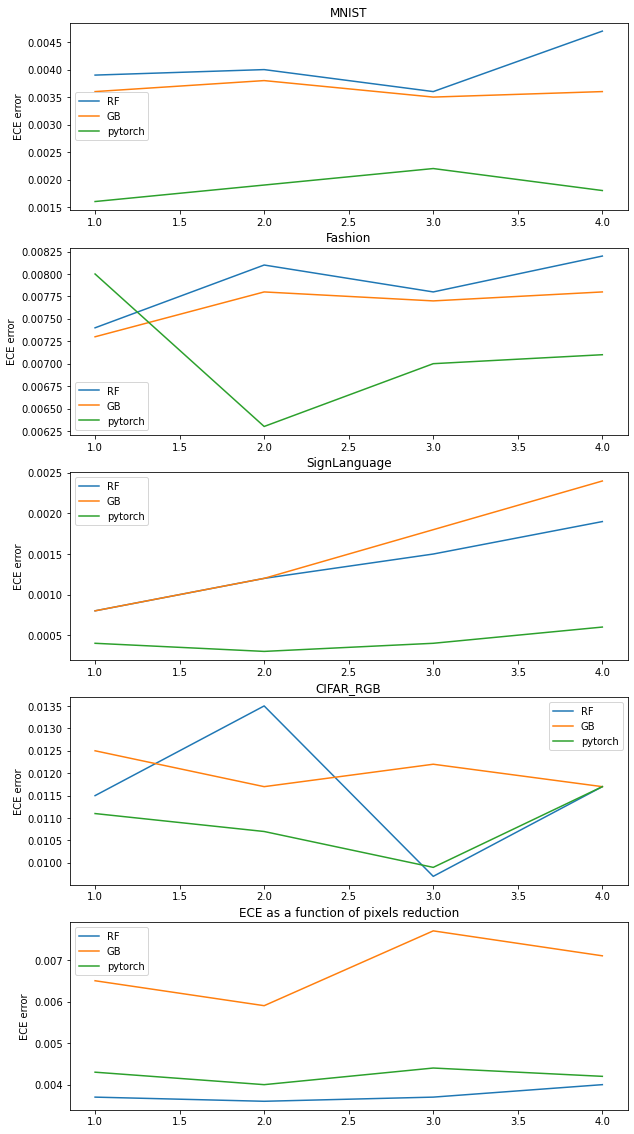

In [33]:
datasets = ['MNIST','Fashion','SignLanguage','CIFAR_RGB','GTSRB_RGB']
models = ['RF','GB','pytorch']
plt.figure(1,figsize=(10,20))

i=1
for dataset_name in datasets:
    for model_name in models:
        plt.subplot(5,1,i)
        y=[ece_dict[dataset_name][model_name]['StabilityCalibrator'][0],ece_dict[dataset_name][model_name]['Stab2avg'][0],ece_dict[dataset_name][model_name]['Stab3avg'][0],ece_dict[dataset_name][model_name]['Stab4avg'][0]]
        x=[1,2,3,4]

        plt.plot(x,y,label=f'{model_name}')
    #plt.xlabel("number of pixels")
    plt.ylabel("ECE error")
    plt.legend(['RF','GB','pytorch'])
        
    plt.title(f'{dataset_name}')
    i+=1
plt.title(f'ECE as a function of pixels reduction')
plt.show()

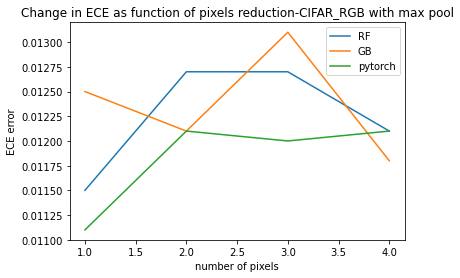

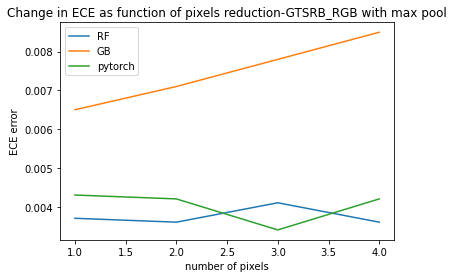

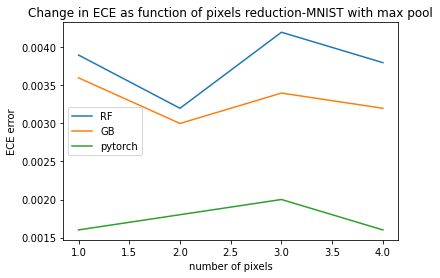

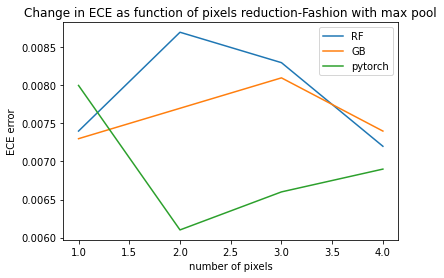

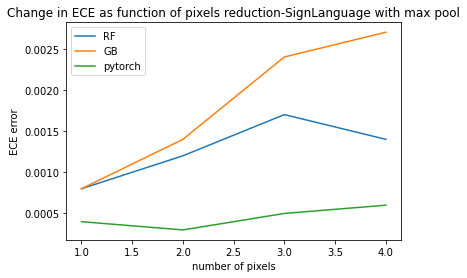

In [34]:
for data in ['CIFAR_RGB','GTSRB_RGB','MNIST','Fashion','SignLanguage']:
    for model_name in ['RF','GB','pytorch']:
        y=[ece_dict[data][model_name]['StabilityCalibrator'][0],ece_dict[data][model_name]['Stab2max'][0],ece_dict[data][model_name]['Stab3max'][0],ece_dict[data][model_name]['Stab4max'][0]]
        x=[1,2,3,4]
        e=[ece_dict[data][model_name]['StabilityCalibrator'][1],ece_dict[data][model_name]['Stab2max'][1],ece_dict[data][model_name]['Stab3max'][1],ece_dict[data][model_name]['Stab4max'][1]]


        plt.plot(x,y,label=f'{model_name}')
        #plt.errorbar(x, y, e)
    plt.xlabel("number of pixels")
    plt.ylabel("ECE error")
    plt.title(f'Change in ECE as function of pixels reduction-{data} with max pool')
    plt.legend(['RF','GB','pytorch'])
    plt.savefig(f'./stab/{data}_ECE_pixel_graph_max.png')
    plt.show()

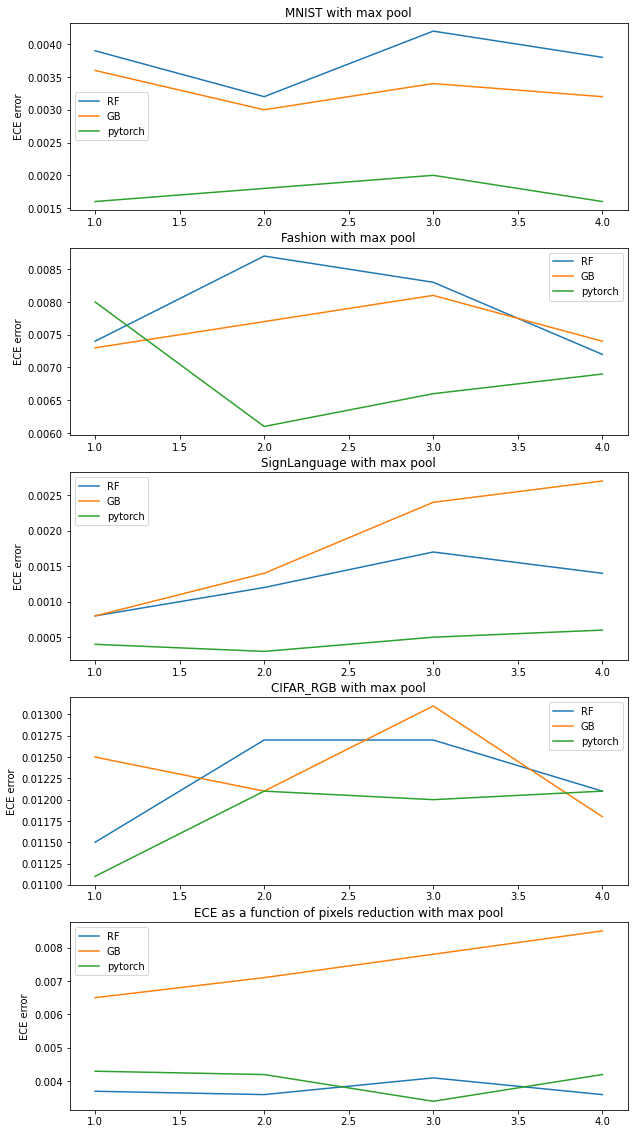

In [35]:
datasets = ['MNIST','Fashion','SignLanguage','CIFAR_RGB','GTSRB_RGB']
models = ['RF','GB','pytorch']
plt.figure(1,figsize=(10,20))

i=1
for dataset_name in datasets:
    for model_name in models:
        plt.subplot(5,1,i)
        y=[ece_dict[dataset_name][model_name]['StabilityCalibrator'][0],ece_dict[dataset_name][model_name]['Stab2max'][0],ece_dict[dataset_name][model_name]['Stab3max'][0],ece_dict[dataset_name][model_name]['Stab4max'][0]]
        x=[1,2,3,4]

        plt.plot(x,y,label=f'{model_name}')
    #plt.xlabel("number of pixels")
    plt.ylabel("ECE error")
    plt.legend(['RF','GB','pytorch'])
        
    plt.title(f'{dataset_name} with max pool')
    i+=1
plt.title(f'ECE as a function of pixels reduction with max pool')
plt.show()

In [36]:
{1: {'MNIST-RF': (14.504847738339228, nan), 'MNIST-GB': (20.48513286468952, nan), 'MNIST-pytorch': (22.018877021206308, nan), 'Fashion-RF': (22.186568761493547, nan), 'Fashion-GB': (17.213909043464312, nan), 'Fashion-pytorch': (21.77179857337523, nan), 'SignLanguage-RF': (38.922914566382715, nan), 'SignLanguage-GB': (42.415085360489414, nan), 'SignLanguage-pytorch': (43.24296350421836, nan), 'CIFAR_RGB-RF': (18.736862280464937, nan), 'CIFAR_RGB-GB': (18.712425943337855, nan), 'CIFAR_RGB-pytorch': (18.81778304165267, nan), 'GTSRB_RGB-RF': (1.5368582495209817, nan), 'GTSRB_RGB-GB': (2.1114939807238384, nan), 'GTSRB_RGB-pytorch': (2.29336112110693, nan)}}
{1: {'MNIST-RF': (14.504847738339228, nan), 'MNIST-GB': (20.48513286468952, nan), 'MNIST-pytorch': (22.018877021206308, nan), 'Fashion-RF': (22.186568761493547, nan), 'Fashion-GB': (17.213909043464312, nan), 'Fashion-pytorch': (21.77179857337523, nan), 'SignLanguage-RF': (38.922914566382715, nan), 'SignLanguage-GB': (42.415085360489414, nan), 'SignLanguage-pytorch': (43.24296350421836, nan), 'CIFAR_RGB-RF': (18.736862280464937, nan), 'CIFAR_RGB-GB': (18.712425943337855, nan), 'CIFAR_RGB-pytorch': (18.81778304165267, nan), 'GTSRB_RGB-RF': (1.5368582495209817, nan), 'GTSRB_RGB-GB': (2.1114939807238384, nan), 'GTSRB_RGB-pytorch': (2.29336112110693, nan)}, 2: {'MNIST-RF': (83.29325442150817, nan), 'MNIST-GB': (83.63714169457049, nan), 'MNIST-pytorch': (83.48628813859557, nan), 'Fashion-RF': (83.70878706110024, nan), 'Fashion-GB': (83.76824512428641, nan), 'Fashion-pytorch': (83.64406354957654, nan), 'SignLanguage-RF': (159.26689656378954, nan), 'SignLanguage-GB': (163.38222630703183, nan), 'SignLanguage-pytorch': (163.506744494672, nan), 'CIFAR_RGB-RF': (73.09906789816327, nan), 'CIFAR_RGB-GB': (73.2509857181584, nan), 'CIFAR_RGB-pytorch': (73.12061815834682, nan), 'GTSRB_RGB-RF': (97.43973710072241, nan), 'GTSRB_RGB-GB': (96.73177841194637, nan), 'GTSRB_RGB-pytorch': (97.49576555174436, nan)}}
{1: {'MNIST-RF': (14.504847738339228, nan), 'MNIST-GB': (20.48513286468952, nan), 'MNIST-pytorch': (22.018877021206308, nan), 'Fashion-RF': (22.186568761493547, nan), 'Fashion-GB': (17.213909043464312, nan), 'Fashion-pytorch': (21.77179857337523, nan), 'SignLanguage-RF': (38.922914566382715, nan), 'SignLanguage-GB': (42.415085360489414, nan), 'SignLanguage-pytorch': (43.24296350421836, nan), 'CIFAR_RGB-RF': (18.736862280464937, nan), 'CIFAR_RGB-GB': (18.712425943337855, nan), 'CIFAR_RGB-pytorch': (18.81778304165267, nan), 'GTSRB_RGB-RF': (1.5368582495209817, nan), 'GTSRB_RGB-GB': (2.1114939807238384, nan), 'GTSRB_RGB-pytorch': (2.29336112110693, nan)}, 2: {'MNIST-RF': (83.29325442150817, nan), 'MNIST-GB': (83.63714169457049, nan), 'MNIST-pytorch': (83.48628813859557, nan), 'Fashion-RF': (83.70878706110024, nan), 'Fashion-GB': (83.76824512428641, nan), 'Fashion-pytorch': (83.64406354957654, nan), 'SignLanguage-RF': (159.26689656378954, nan), 'SignLanguage-GB': (163.38222630703183, nan), 'SignLanguage-pytorch': (163.506744494672, nan), 'CIFAR_RGB-RF': (73.09906789816327, nan), 'CIFAR_RGB-GB': (73.2509857181584, nan), 'CIFAR_RGB-pytorch': (73.12061815834682, nan), 'GTSRB_RGB-RF': (97.43973710072241, nan), 'GTSRB_RGB-GB': (96.73177841194637, nan), 'GTSRB_RGB-pytorch': (97.49576555174436, nan)}, 3: {'MNIST-RF': (188.56931574550197, nan), 'MNIST-GB': (188.31957785400155, nan), 'MNIST-pytorch': (189.08455129695804, nan), 'Fashion-RF': (185.54666770949842, nan), 'Fashion-GB': (188.55599809364037, nan), 'Fashion-pytorch': (188.40346559733706, nan), 'SignLanguage-RF': (338.77396776810207, nan), 'SignLanguage-GB': (337.7182071256529, nan), 'SignLanguage-pytorch': (339.90167295780753, nan), 'CIFAR_RGB-RF': (178.35297269660248, nan), 'CIFAR_RGB-GB': (178.77536794641225, nan), 'CIFAR_RGB-pytorch': (179.51757677225476, nan), 'GTSRB_RGB-RF': (200.10401943695007, nan), 'GTSRB_RGB-GB': (200.61682360979242, nan), 'GTSRB_RGB-pytorch': (200.23018342708232, nan)}}
{1: {'MNIST-RF': (14.504847738339228, nan), 'MNIST-GB': (20.48513286468952, nan), 'MNIST-pytorch': (22.018877021206308, nan), 'Fashion-RF': (22.186568761493547, nan), 'Fashion-GB': (17.213909043464312, nan), 'Fashion-pytorch': (21.77179857337523, nan), 'SignLanguage-RF': (38.922914566382715, nan), 'SignLanguage-GB': (42.415085360489414, nan), 'SignLanguage-pytorch': (43.24296350421836, nan), 'CIFAR_RGB-RF': (18.736862280464937, nan), 'CIFAR_RGB-GB': (18.712425943337855, nan), 'CIFAR_RGB-pytorch': (18.81778304165267, nan), 'GTSRB_RGB-RF': (1.5368582495209817, nan), 'GTSRB_RGB-GB': (2.1114939807238384, nan), 'GTSRB_RGB-pytorch': (2.29336112110693, nan)}, 2: {'MNIST-RF': (83.29325442150817, nan), 'MNIST-GB': (83.63714169457049, nan), 'MNIST-pytorch': (83.48628813859557, nan), 'Fashion-RF': (83.70878706110024, nan), 'Fashion-GB': (83.76824512428641, nan), 'Fashion-pytorch': (83.64406354957654, nan), 'SignLanguage-RF': (159.26689656378954, nan), 'SignLanguage-GB': (163.38222630703183, nan), 'SignLanguage-pytorch': (163.506744494672, nan), 'CIFAR_RGB-RF': (73.09906789816327, nan), 'CIFAR_RGB-GB': (73.2509857181584, nan), 'CIFAR_RGB-pytorch': (73.12061815834682, nan), 'GTSRB_RGB-RF': (97.43973710072241, nan), 'GTSRB_RGB-GB': (96.73177841194637, nan), 'GTSRB_RGB-pytorch': (97.49576555174436, nan)}, 3: {'MNIST-RF': (188.56931574550197, nan), 'MNIST-GB': (188.31957785400155, nan), 'MNIST-pytorch': (189.08455129695804, nan), 'Fashion-RF': (185.54666770949842, nan), 'Fashion-GB': (188.55599809364037, nan), 'Fashion-pytorch': (188.40346559733706, nan), 'SignLanguage-RF': (338.77396776810207, nan), 'SignLanguage-GB': (337.7182071256529, nan), 'SignLanguage-pytorch': (339.90167295780753, nan), 'CIFAR_RGB-RF': (178.35297269660248, nan), 'CIFAR_RGB-GB': (178.77536794641225, nan), 'CIFAR_RGB-pytorch': (179.51757677225476, nan), 'GTSRB_RGB-RF': (200.10401943695007, nan), 'GTSRB_RGB-GB': (200.61682360979242, nan), 'GTSRB_RGB-pytorch': (200.23018342708232, nan)}, 4: {'MNIST-RF': (273.2407445533997, nan), 'MNIST-GB': (286.4621253400784, nan), 'MNIST-pytorch': (286.6662108928116, nan), 'Fashion-RF': (282.783643399206, nan), 'Fashion-GB': (281.60920003270337, nan), 'Fashion-pytorch': (282.0863610066421, nan), 'SignLanguage-RF': (473.52838585088244, nan), 'SignLanguage-GB': (473.6993880696908, nan), 'SignLanguage-pytorch': (475.7146167826981, nan), 'CIFAR_RGB-RF': (258.40079929226476, nan), 'CIFAR_RGB-GB': (258.22224825964906, nan), 'CIFAR_RGB-pytorch': (258.12081470969895, nan), 'GTSRB_RGB-RF': (354.0796405906169, nan), 'GTSRB_RGB-GB': (349.86662313998204, nan), 'GTSRB_RGB-pytorch': (350.3390375354912, nan)}}
[('MNIST', 'RF', 0, 965.1945509910583, 14.504847738339228), ('MNIST', 'GB', 0, 683.4224650859833, 20.48513286468952), ('MNIST', 'pytorch', 0, 635.8180749416351, 22.018877021206308), ('Fashion', 'RF', 0, 631.0123999118805, 22.186568761493547), ('Fashion', 'GB', 0, 813.2958042621613, 17.213909043464312), ('Fashion', 'pytorch', 0, 643.0336911678314, 21.77179857337523), ('SignLanguage', 'RF', 0, 177.94145369529724, 38.922914566382715), ('SignLanguage', 'GB', 0, 163.2909598350525, 42.415085360489414), ('SignLanguage', 'pytorch', 0, 160.16478610038757, 43.24296350421836), ('CIFAR_RGB', 'RF', 0, 640.448748588562, 18.736862280464937), ('CIFAR_RGB', 'GB', 0, 641.2851030826569, 18.712425943337855), ('CIFAR_RGB', 'pytorch', 0, 637.6946728229523, 18.81778304165267), ('GTSRB_RGB', 'RF', 0, 6746.2305018901825, 1.5368582495209817), ('GTSRB_RGB', 'GB', 0, 4910.267372131348, 2.1114939807238384), ('GTSRB_RGB', 'pytorch', 0, 4520.875454187393, 2.29336112110693), ('MNIST', 'RF', 0, 168.0808379650116, 83.29325442150817), ('MNIST', 'GB', 0, 167.38974714279175, 83.63714169457049), ('MNIST', 'pytorch', 0, 167.69220805168152, 83.48628813859557), ('Fashion', 'RF', 0, 167.24648022651672, 83.70878706110024), ('Fashion', 'GB', 0, 167.127769947052, 83.76824512428641), ('Fashion', 'pytorch', 0, 167.37589502334595, 83.64406354957654), ('SignLanguage', 'RF', 0, 43.48675179481506, 159.26689656378954), ('SignLanguage', 'GB', 0, 42.39139199256897, 163.38222630703183), ('SignLanguage', 'pytorch', 0, 42.35910892486572, 163.506744494672), ('CIFAR_RGB', 'RF', 0, 164.16077995300293, 73.09906789816327), ('CIFAR_RGB', 'GB', 0, 163.82032108306885, 73.2509857181584), ('CIFAR_RGB', 'pytorch', 0, 164.112398147583, 73.12061815834682), ('GTSRB_RGB', 'RF', 0, 106.40422797203064, 97.43973710072241), ('GTSRB_RGB', 'GB', 0, 107.18297719955444, 96.73177841194637), ('GTSRB_RGB', 'pytorch', 0, 106.34308004379272, 97.49576555174436), ('MNIST', 'RF', 0, 74.24325609207153, 188.56931574550197), ('MNIST', 'GB', 0, 74.34171295166016, 188.31957785400155), ('MNIST', 'pytorch', 0, 74.04095101356506, 189.08455129695804), ('Fashion', 'RF', 0, 75.45271587371826, 185.54666770949842), ('Fashion', 'GB', 0, 74.2484998703003, 188.55599809364037), ('Fashion', 'pytorch', 0, 74.30861186981201, 188.40346559733706), ('SignLanguage', 'RF', 0, 20.444309949874878, 338.77396776810207), ('SignLanguage', 'GB', 0, 20.508222103118896, 337.7182071256529), ('SignLanguage', 'pytorch', 0, 20.37648105621338, 339.90167295780753), ('CIFAR_RGB', 'RF', 0, 67.28231000900269, 178.35297269660248), ('CIFAR_RGB', 'GB', 0, 67.12334108352661, 178.77536794641225), ('CIFAR_RGB', 'pytorch', 0, 66.84582209587097, 179.51757677225476), ('GTSRB_RGB', 'RF', 0, 51.8130521774292, 200.10401943695007), ('GTSRB_RGB', 'GB', 0, 51.68061089515686, 200.61682360979242), ('GTSRB_RGB', 'pytorch', 0, 51.780405044555664, 200.23018342708232), ('MNIST', 'RF', 0, 51.236868143081665, 273.2407445533997), ('MNIST', 'GB', 0, 48.87208032608032, 286.4621253400784), ('MNIST', 'pytorch', 0, 48.837286949157715, 286.6662108928116), ('Fashion', 'RF', 0, 49.507813930511475, 282.783643399206), ('Fashion', 'GB', 0, 49.714284896850586, 281.60920003270337), ('Fashion', 'pytorch', 0, 49.63019108772278, 282.0863610066421), ('SignLanguage', 'RF', 0, 14.626367092132568, 473.52838585088244), ('SignLanguage', 'GB', 0, 14.621087074279785, 473.6993880696908), ('SignLanguage', 'pytorch', 0, 14.559149026870728, 475.7146167826981), ('CIFAR_RGB', 'RF', 0, 46.43948483467102, 258.40079929226476), ('CIFAR_RGB', 'GB', 0, 46.471596002578735, 258.22224825964906), ('CIFAR_RGB', 'pytorch', 0, 46.4898579120636, 258.12081470969895), ('GTSRB_RGB', 'RF', 0, 29.281548023223877, 354.0796405906169), ('GTSRB_RGB', 'GB', 0, 29.63415002822876, 349.86662313998204), ('GTSRB_RGB', 'pytorch', 0, 29.594189882278442, 350.3390375354912)]
{1: {'MNIST-RF': (14.504847738339228, nan), 'MNIST-GB': (20.48513286468952, nan), 'MNIST-pytorch': (22.018877021206308, nan), 'Fashion-RF': (22.186568761493547, nan), 'Fashion-GB': (17.213909043464312, nan), 'Fashion-pytorch': (21.77179857337523, nan), 'SignLanguage-RF': (38.922914566382715, nan), 'SignLanguage-GB': (42.415085360489414, nan), 'SignLanguage-pytorch': (43.24296350421836, nan), 'CIFAR_RGB-RF': (18.736862280464937, nan), 'CIFAR_RGB-GB': (18.712425943337855, nan), 'CIFAR_RGB-pytorch': (18.81778304165267, nan), 'GTSRB_RGB-RF': (1.5368582495209817, nan), 'GTSRB_RGB-GB': (2.1114939807238384, nan), 'GTSRB_RGB-pytorch': (2.29336112110693, nan)}, 2: {'MNIST-RF': (83.29325442150817, nan), 'MNIST-GB': (83.63714169457049, nan), 'MNIST-pytorch': (83.48628813859557, nan), 'Fashion-RF': (83.70878706110024, nan), 'Fashion-GB': (83.76824512428641, nan), 'Fashion-pytorch': (83.64406354957654, nan), 'SignLanguage-RF': (159.26689656378954, nan), 'SignLanguage-GB': (163.38222630703183, nan), 'SignLanguage-pytorch': (163.506744494672, nan), 'CIFAR_RGB-RF': (73.09906789816327, nan), 'CIFAR_RGB-GB': (73.2509857181584, nan), 'CIFAR_RGB-pytorch': (73.12061815834682, nan), 'GTSRB_RGB-RF': (97.43973710072241, nan), 'GTSRB_RGB-GB': (96.73177841194637, nan), 'GTSRB_RGB-pytorch': (97.49576555174436, nan)}, 3: {'MNIST-RF': (188.56931574550197, nan), 'MNIST-GB': (188.31957785400155, nan), 'MNIST-pytorch': (189.08455129695804, nan), 'Fashion-RF': (185.54666770949842, nan), 'Fashion-GB': (188.55599809364037, nan), 'Fashion-pytorch': (188.40346559733706, nan), 'SignLanguage-RF': (338.77396776810207, nan), 'SignLanguage-GB': (337.7182071256529, nan), 'SignLanguage-pytorch': (339.90167295780753, nan), 'CIFAR_RGB-RF': (178.35297269660248, nan), 'CIFAR_RGB-GB': (178.77536794641225, nan), 'CIFAR_RGB-pytorch': (179.51757677225476, nan), 'GTSRB_RGB-RF': (200.10401943695007, nan), 'GTSRB_RGB-GB': (200.61682360979242, nan), 'GTSRB_RGB-pytorch': (200.23018342708232, nan)}, 4: {'MNIST-RF': (273.2407445533997, nan), 'MNIST-GB': (286.4621253400784, nan), 'MNIST-pytorch': (286.6662108928116, nan), 'Fashion-RF': (282.783643399206, nan), 'Fashion-GB': (281.60920003270337, nan), 'Fashion-pytorch': (282.0863610066421, nan), 'SignLanguage-RF': (473.52838585088244, nan), 'SignLanguage-GB': (473.6993880696908, nan), 'SignLanguage-pytorch': (475.7146167826981, nan), 'CIFAR_RGB-RF': (258.40079929226476, nan), 'CIFAR_RGB-GB': (258.22224825964906, nan), 'CIFAR_RGB-pytorch': (258.12081470969895, nan), 'GTSRB_RGB-RF': (354.0796405906169, nan), 'GTSRB_RGB-GB': (349.86662313998204, nan), 'GTSRB_RGB-pytorch': (350.3390375354912, nan)}}

NameError: name 'nan' is not defined

In [ ]:
           
            new_stab_dir= f'./stab/{dataset_name}/'
            
            for method in ['pool','maxpool','resize','PCA','rand_pix','rand_set','kmeans']:
                for red_param in [2,3,4]:
                    if method in ['pool','maxpool']:
                        method_name=f'{red_param}{method}'
                    else:
                        method_name=f'{method}_{red_param}'
                    ece[method_name]= calc_ece(model_info.y_pred_val,model_info.data.y_val,model_info.y_pred_test, model_info.data.y_test , method_name,dataset_name,model_name,shuffle,new_stab_dir)
#            



In [5]:
df=pd.read_csv('all_eces.csv')
i=0
ece_dict={}
for data in ['MNIST','Fashion','SignLanguage']:#,'CIFAR_RGB','GTSRB_RGB']:
    model_dict={}
    for model_name in ['RF','GB','pytorch']:
        method_dict={}
        for method in ['pool','maxpool','resize','PCA','rand_pix','rand_set','kmeans']:
            for red_param in [2,3,4]:
                if method in ['pool','maxpool']:
                    method_name=f'{red_param}{method}'
                else:
                    method_name=f'{method}_{red_param}'
                ece,std = df[method_name].iloc[i].split('+-')
                method_dict[method_name]=(float(ece),float(std))
        i+=1
        model_dict[model_name]=method_dict
    ece_dict[data]=model_dict
ece_dict

{'MNIST': {'RF': {'2pool': (0.0081, 0.0016),
   '3pool': (0.0078, 0.001),
   '4pool': (0.0082, 0.0014),
   '2maxpool': (0.0087, 0.0014),
   '3maxpool': (0.0083, 0.0016),
   '4maxpool': (0.0072, 0.0013),
   'resize_2': (0.0081, 0.0016),
   'resize_3': (0.0082, 0.0019),
   'resize_4': (0.0081, 0.0011),
   'PCA_2': (0.0079, 0.0012),
   'PCA_3': (0.0072, 0.0008),
   'PCA_4': (0.0082, 0.002),
   'rand_pix_2': (0.0125, 0.0024),
   'rand_pix_3': (0.0179, 0.0029),
   'rand_pix_4': (0.0188, 0.0024),
   'rand_set_2': (0.0075, 0.0012),
   'rand_set_3': (0.0073, 0.0009),
   'rand_set_4': (0.0086, 0.0015),
   'kmeans_2': (0.0087, 0.0008),
   'kmeans_3': (0.0086, 0.0017),
   'kmeans_4': (0.0076, 0.0008)},
  'GB': {'2pool': (0.0078, 0.0009),
   '3pool': (0.0077, 0.002),
   '4pool': (0.0078, 0.0014),
   '2maxpool': (0.0077, 0.0015),
   '3maxpool': (0.0081, 0.0013),
   '4maxpool': (0.0074, 0.0017),
   'resize_2': (0.0078, 0.0009),
   'resize_3': (0.0078, 0.0016),
   'resize_4': (0.0078, 0.0012),
   'PC

In [ ]:




fig = plt.figure(figsize=(15,10), dpi=80)
x = np.array(df_comparison.columns)
y = df_comparison.iloc[0]
# yerr = np.linspace(0.05, 0.2, 10)

# plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

# plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

# plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
#              label='uplims=True, lolims=True')

# upperlimits = [True, False] * 5
# lowerlimits = [False, True] * 5
# plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
#              label='subsets of uplims and lolims')

# plt.legend(loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.scatter(x,y)

plt.show()

In [ ]:
datasets = ['MNIST','Fashion','SignLanguage']#,'CIFAR_RGB','GTSRB_RGB']
models = ['RF','GB','pytorch']
plt.figure(1,figsize=(10,20))

i=1
for dataset_name in datasets:
    for model_name in models:
        plt.subplot(5,1,i)
        y=[ece_dict[dataset_name][model_name]['StabilityCalibrator'][0],ece_dict[dataset_name][model_name]['Stab2max'][0],ece_dict[dataset_name][model_name]['Stab3max'][0],ece_dict[dataset_name][model_name]['Stab4max'][0]]
        x=[1,2,3,4]

        plt.plot(x,y,label=f'{model_name}')
    #plt.xlabel("number of pixels")
    plt.ylabel("ECE error")
    plt.legend(['RF','GB','pytorch'])
        
    plt.title(f'{dataset_name} with max pool')
    i+=1
plt.title(f'ECE as a function of pixels reduction with max pool')
plt.show()